In [1]:
import numpy as np


# Problem1
## 1.

In [2]:
class logistic_regression:
    def __init__(self,x,y,w):
        self.x=x
        self.y=y
        self.w=w
        #self.w=np.random.randn(self.x[0].size)
    def log_reg(self):
        sum=0
        for i in range(len(x)):
            sum=sum+np.log(1+np.exp(-self.y[i]*np.dot(self.w.T,self.x[i])))
            #print(str(i)+" "+str(sum))
        return sum+np.dot(self.w.T,self.w)              
    def gradient(self):
        h=1/(2**12)
        gradient=np.zeros_like(self.w)
        for i in range(self.w.size):
            tmp=self.w[i]
            self.w[i]=self.w[i]+h
            f1=self.log_reg()
            self.w[i]=tmp-h
            f2=self.log_reg()
            gradient[i]=(f1-f2)/(2*h)
            self.w[i]=tmp
        return gradient
    def hessian(self):
        mat=np.zeros([len(self.w),len(self.w)])
        h=1/(2**10)
        for i in range(len(self.w)):
            tmp=self.w[i]
            self.w[i]=tmp+h
            f1=self.gradient()
            self.w[i]=tmp-h
            f2=self.gradient()
            mat[i]=(f1-f2)/(2*h)
            self.w[i]=tmp
        return mat.T
    def steepest_gradient_method(self):
        alpha=0.001
        array=[]
        ans=self.log_reg()
        for i in range(100):
            array=np.append(array,ans)
            self.w=self.w-alpha*self.gradient()
            ans=self.log_reg()
            if i%10==0:
                
                print(str(i)+" :"+str(ans))
            
        return array
    def newton_based_method(self):
        alpha=1
        array=[]
        ans=self.log_reg()
        for i in range(100):
            array=np.append(array,ans)
            H=self.hessian()
            invH=np.linalg.inv(H)
            #print()
            #print(invH)
            #print(self.gradient())
            d=np.dot(invH,-self.gradient())
            #print(d)
            #print(np.dot(invH,-self.gradient()))
            self.w=self.w+alpha*d
            ans=self.log_reg()
            if i<10:
                print(ans)
            #print(invH)
                print("##########################")
        return array
    def judge(self,x):
        return 1 if np.dot(self.w.T,x)>=0 else -1

In [3]:
import numpy as np
x=np.random.normal(0,0.3,(500,7))
y=[1 if sum(x[i])>=0 else -1 for i in range(len(x))]
print(str(sum(x[0]))+" "+str(y[0]))
w=np.random.randn(x[0].size)
f=logistic_regression(x,y,w)
print(f.log_reg())
f.steepest_gradient_method()
print(f.log_reg())
correct=0
for i in range(100):
    a=np.random.randn(7)
    #print(str(f.judge(a))+" "+str(sum(a)))
    if np.sum(a)>=0 and f.judge(a)==1:
        correct=correct+1
    if np.sum(a)<0 and f.judge(a)==-1:
        correct=correct+1
print("accuracy"+str(correct)+"%")

-1.623958167161815 -1
394.61677790046656
0 :389.84172411127065
10 :348.00595408107307
20 :315.450241244821
30 :290.175666917243
40 :270.4766862478472
50 :255.00205605318172
60 :242.72485035947048
70 :232.88018978676283
80 :224.90212333768022
90 :218.37120523343916
213.47039906938645
accuracy96%


## 2.

In [4]:
def fun(x):
    a=0
    for i in range(x.size):
        if x[i]>0:
            a=a+1
        else:
            a=a-1
    if a>=0:
        return 1
    else :
        return -1
dim=10
x=np.random.normal(0,0.4,(200,dim))
print(x)
#y=[fun(x[i]) for i in range(len(x))]
w=np.random.randn(x[0].size)
y=[1 if sum(x[i])>=0 else -1 for i in range(len(x))]
print(str(sum(x[0]))+" "+str(y[0]))
f=logistic_regression(x,y,w)
print(f.log_reg())
f.steepest_gradient_method()
f1=logistic_regression(x,y,w)
print(f1.log_reg())
f1.newton_based_method()

correct=0
correct1=0
for i in range(100):
    a=np.random.randn(dim)
    if np.sum(a)>=0 and f.judge(a)==1:
        correct=correct+1
    if np.sum(a)<0 and f.judge(a)==-1:
        correct=correct+1
    if np.sum(a)>=0 and f1.judge(a)==1:
        correct1=correct+1
    if np.sum(a)<0 and f1.judge(a)==-1:
        correct1=correct+1
print("accuracy"+str(correct)+"%")
print("accuracy"+str(correct)+"%")

[[ 0.30280168 -0.44853542  0.23554955 ... -0.15550856 -0.20303107
   0.26497791]
 [ 0.3127667   0.05398721 -0.15596103 ... -1.00043805 -0.019464
  -0.41168994]
 [ 0.14289943 -0.36919137 -0.28141377 ... -0.10943095 -0.66065222
  -0.06353058]
 ...
 [-0.4754268  -0.19145282  0.44915581 ...  0.47314536 -0.21585021
  -0.68652588]
 [ 0.06542864  0.53742757  0.12451925 ... -0.29568277  0.17763998
  -0.13327878]
 [-0.17906556  0.51950085 -0.44545991 ... -0.29797055  0.89495995
   0.39168422]]
-0.644185368456679 -1
164.43821461972513
0 :163.19705689112325
10 :151.6211690507136
20 :141.4667142296314
30 :132.59581707151287
40 :124.87524371746338
50 :118.1782457917828
60 :112.38593637144082
70 :107.3882498289367
80 :103.08451621026674
90 :99.383686918473
164.43821461972513
86.50024264666973
##########################
75.67590080016728
##########################
75.54917939040632
##########################
75.54911631962368
##########################
75.5491163196073
##########################
75.5

## 3.

In [5]:
dim=10
x=np.random.normal(0,0.3,(200,dim))
print(x)
w=np.random.randn(x[0].size)
w1=w
#y=[fun(x[i]) for i in range(len(x))]
y=[1 if sum(x[i])>=0 else -1 for i in range(len(x))]
print(str(sum(x[0]))+" "+str(y[0]))
f=logistic_regression(x,y,w)
fir=f.log_reg()
a1=f.steepest_gradient_method()
f1=logistic_regression(x,y,w1)
sec=f1.log_reg()
a2=f1.newton_based_method()
print(str(fir)+" "+str(sec))
for i in range(10):
    print(str(a1[i])+" "+str(a2[i]))

[[-0.20135764 -0.27171472  0.66843506 ... -0.18176288  0.19671755
   0.34337833]
 [-0.03929593  0.21448912  0.44802267 ...  0.37127575  0.14012966
  -0.31491936]
 [ 0.26218852  0.28525439  0.58337531 ... -0.5315362  -0.22442176
  -0.03244183]
 ...
 [-0.31034423 -0.25975493  0.28022568 ...  0.1526987   0.00839227
  -0.10399469]
 [ 0.95844324  0.01956604 -0.10666678 ...  0.22835842 -0.27479686
   0.07510744]
 [ 0.19219351  0.09091234  0.18354436 ... -0.04737171  0.11634719
   0.44111896]]
-0.6710869791212564 -1
0 :164.45496256502014
10 :155.281156585449
20 :147.2464084352859
30 :140.22848614317368
40 :134.10948123456075
50 :128.77889645766413
60 :124.13565947796741
70 :120.08909709942165
80 :116.55907113720454
90 :113.47553308106123
90.14163818707294
##########################
89.18832568658993
##########################
89.18730336904554
##########################
89.18730336669461
##########################
89.18730336669465
##########################
89.18730336669464
################

165.4397319375757


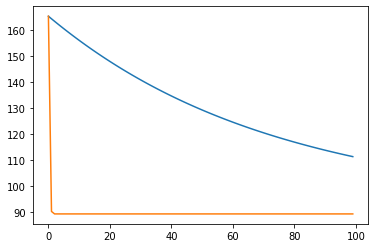

In [8]:
import matplotlib.pyplot as plt
A=range(100)
plt.plot(A,a1[0:100])
plt.plot(A,a2[0:100])
print(a2[0])
plt.show()